# **Stage 1**

## Understanding the Dataset

*   Dataset pengamatan ini diambil dari sistem biro meteorologi. Sebagian besar data dihasilkan dan ditangani secara otomatis.
*   Dataset ini memaparkan data (145.460 observasi) dalam beberapa tahun (2008-12-01 s/d 2017-07-01) meteorologi di sejumlah lokasi (49) di Australia dengan beberapa parameter (variabel) yang berhubungan seperti temperatur, evaporasi, curah hujan, tekanan udara, kelembapan udara, sinar matahari, awan, dan kecepatan angin.
*   Dari waktu ke waktu, pengamatan tidak akan tersedia, karena berbagai alasan. Kadang-kadang ketika suhu maksimum dan minimum harian, curah hujan atau penguapan hilang, nilai berikutnya yang diberikan telah diakumulasikan selama beberapa hari daripada satu hari normal.
*   Ringkasan statistik (rata-rata, terendah, tertinggi dan total) telah dihitung menggunakan data yang tersedia pada saat persiapan. Statistik hanya akan dihitung jika masuk akal untuk melakukannya (misalnya, "suhu maksimum total" dan "hembusan angin maksimum rata-rata" tidak dihitung, tetapi "curah hujan total" dan "suhu minimum rata-rata" dihitung).
*   Dengan beberapa parameter (variabel) ini kita akan memprediksi target variabel yang mana adalah RainTomorrow (Hujan besok).
*   Tabel memahami data per kolom.
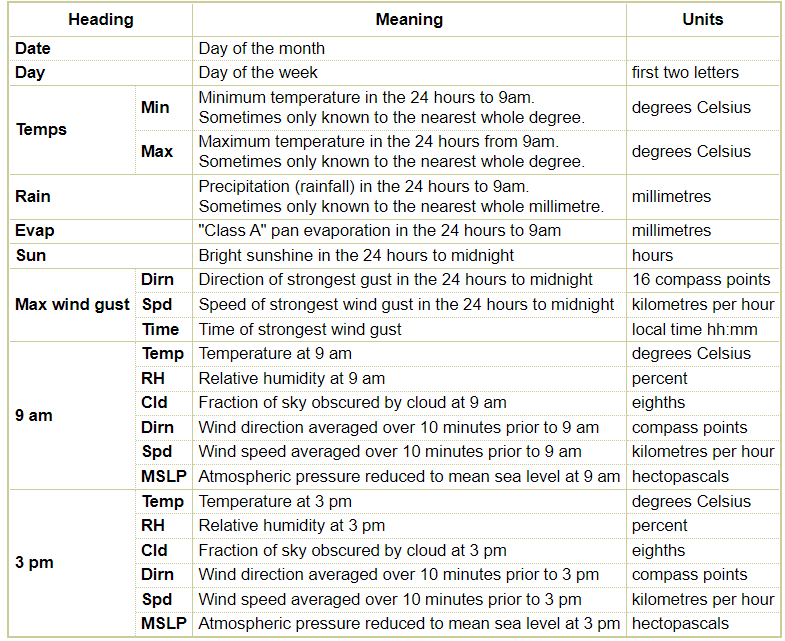

# **Stage 2**

## Identify Which Activities Should be Done

*   melakukan eksplorasi data analisis dan data visualisasi.
*   melakukan pra-proses data
*   membuat model machine learning untuk klasifikasi hujan / prediksi hujan

# **Stage 3**

## Exploratory Data Analysis and Data Visualization




In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import os

### Import Dataset

In [ ]:
SourceFile = '/content/drive/MyDrive/weatherAUS.csv'
df = pd.read_csv(SourceFile)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Info Dataset

In [ ]:
#mendeskripsikan data yang ada pada dataset 
print(df.info())
#mencari nilai statistik penyebaran nya
print(df.describe())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

*   Terdapat 16 variabel kontinu diantara nya adalah : MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am dan Temp3pm.
*   Terdapat 6 variabel kategori diantara nya adalah : Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, dan RainTomorrow.
*   Variabel RainTomorrow menjadi target variabel.






In [ ]:
# mencari missing data pada dataset
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])
missing_data.head(10)

,Total Missing,%
Sunshine,69835,48.0
Evaporation,62790,43.2
Cloud3pm,59358,40.8
Cloud9am,55888,38.4
Pressure9am,15065,10.4
Pressure3pm,15028,10.3
WindDir9am,10566,7.3
WindGustDir,10326,7.1
WindGustSpeed,10263,7.1
Humidity3pm,4507,3.1


Hampir semua variabel memiliki nilai yang hilang kecuali Date dan Location.Top 5 variabel nya antara lain adalah : 
*   Sunshine (48.01%)
*   Evaporation (43.16%)
*   Cloud3pm (40,81%)
*   Cloud9am (38.42%)
*   Pressure9am (10.35%)


### Data Visualization

#### Find the correlation of data

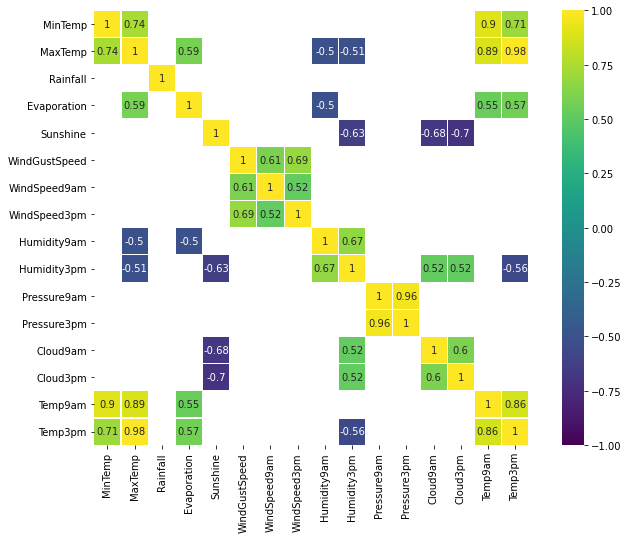

In [ ]:
#Visualisasi cek korelasi menggunakan heatmap pearsonr
corr = df.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True);

plt.show()

Angka 0 tidak memiliki hubungan sedangkan angka yang mendekati 1 memiliki korelasi yang kuat(positif) dan mendekati -1 memiliki korelasi yang kuat(negatif).

*   Pressure9am and Pressure3pm memiliki korelasi yang kuat (positif).
*   Cloud3pm , Cloud9am dengan Sunshine memiliki korelasi yang kuat (negatif).
*   MinTemp, MaxTemp, Temp9am, Temp3pm memiliki korelasi yang kuat (positif).
*   WindGustSpeed, WindSpeed9am, WindSpeed3pm memilik korelasi yang cukup baik (positif).
*   Cloud9am, Cloud3pm, dengan Humidity3pm memiliki korelasi yang cukup baik (positif).
*   Humidity9am, Humidity3pm, dengan Sunshine memiliki korelasi yang cukup baik (negatif).
*   MaxTemp, Temp9am, Temp3pm dengan Evaporation memilik korelasi yang cukup baik (positif).






<Figure size 864x576 with 0 Axes>

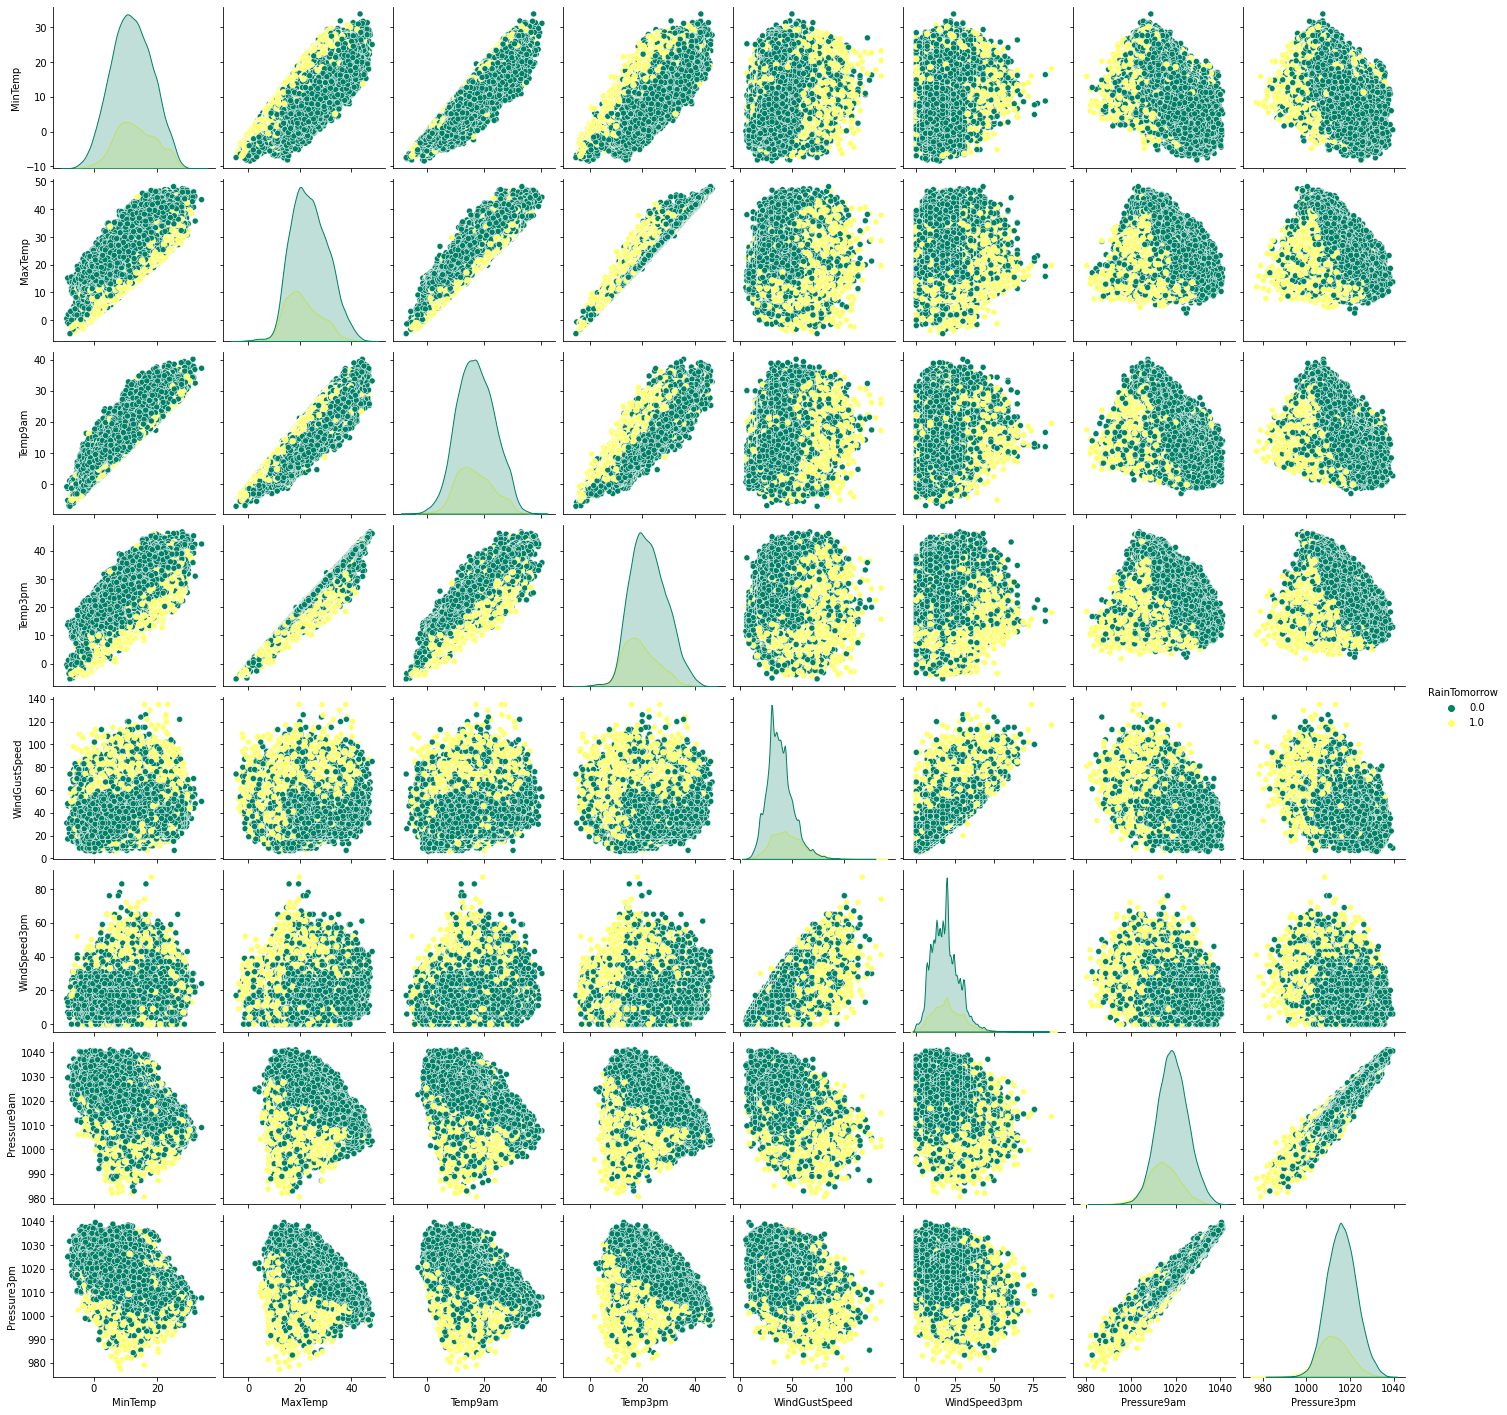

In [ ]:
#Visualisasi korelasi variabel diatas menggunakan scatterplot
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed',
           'WindSpeed3pm', 'Pressure9am', 'Pressure3pm', 'RainTomorrow']

plt.figure(figsize=(12, 8))
sns.pairplot(df_new[num_var], kind='scatter', hue='RainTomorrow' ,diag_kind='kde', palette='summer')
plt.show()

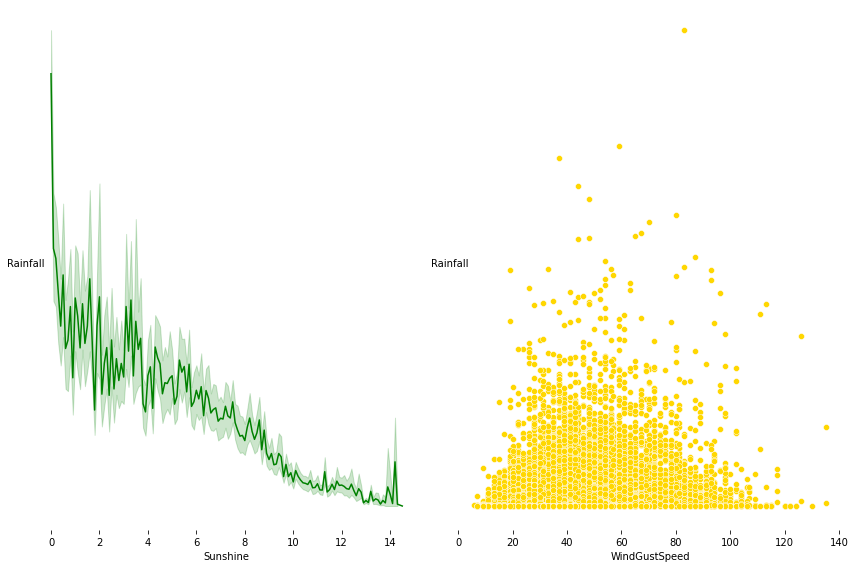

In [ ]:
#Visualisasi hubungan 2 variabel dengan lineplot dan scatterplot
fig=plt.figure(figsize=(12,8),facecolor='white') 
gs=fig.add_gridspec(1,2)

ax=[_ for _ in range(2)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

sns.lineplot(data=df,x='Sunshine',y='Rainfall', ax=ax[0],color='green')
sns.scatterplot(data=df,x='WindGustSpeed',y='Rainfall', ax=ax[1],color='gold')

for i in range(2):
    ax[i].set_ylabel('Rainfall').set_rotation(0)
    ax[i].set_yticklabels('')
    ax[i].tick_params(axis='y',length=0)
    for direction in ['top','right','left']:
        ax[i].set_frame_on(False)
        
         
plt.tight_layout()
plt.show()

*   Hubungan antara sunshine dengan rainfall. Semakin tinggi sunshine , rainfall akan turun.
*   Hubungan antara WindGustSpeed dengan rainfall. Tidak ada hubungan yang jelas antara 2 parameter tsb.



#### Find the frequency of data

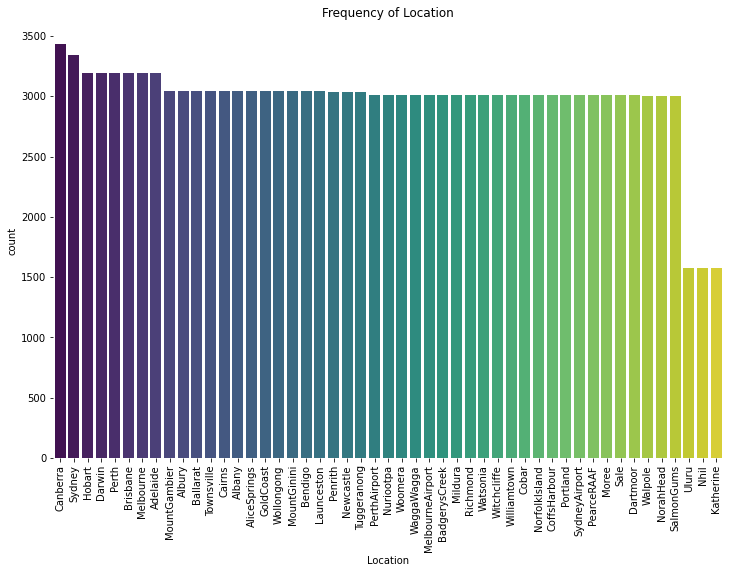

In [ ]:
#Visualisasi frekuensi kolom Location
plt.figure(figsize=(12, 8))

j = sns.countplot(x = 'Location', data = df, order = df['Location'].value_counts().index,
              palette='viridis',linewidth=2)
j.set_xticklabels(j.get_xticklabels(), rotation=90)
j.set_title('Frequency of Location', loc='center')
sns.despine(bottom = True, left = True) 



Top 5 lokasi dengan frekuensi terbanyak :
1.   Canberra
2.   Sydney
3.   Darwin
4.   Melbourne
5.   Perth





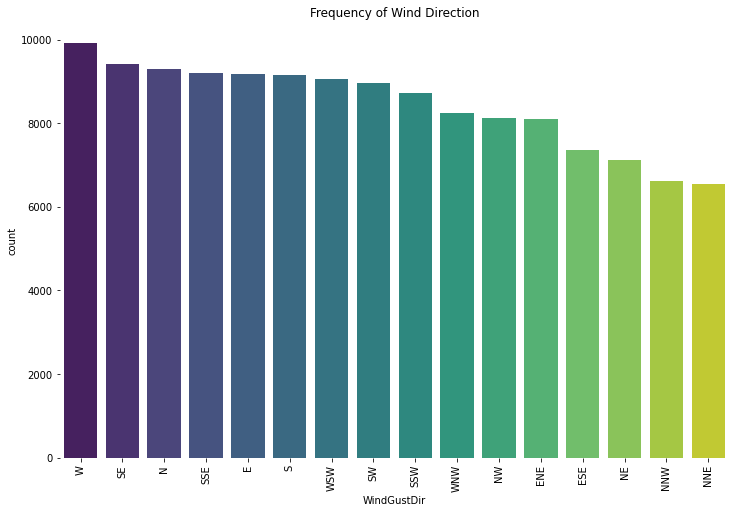

In [ ]:
#Visualisasi frekuensi kolom WindGustDir
plt.figure(figsize=(12, 8))

j = sns.countplot(x = 'WindGustDir', data = df, order = df['WindGustDir'].value_counts().index,
              palette='viridis',linewidth=2)
j.set_xticklabels(j.get_xticklabels(), rotation=90)
j.set_title('Frequency of Wind Direction', loc='center')
sns.despine(bottom = True, left = True) 


Top 5 Arah angin dengan frekuensi terbanyak :
1.   W
2.   SE
3.   N
4.   SSE
5.   E

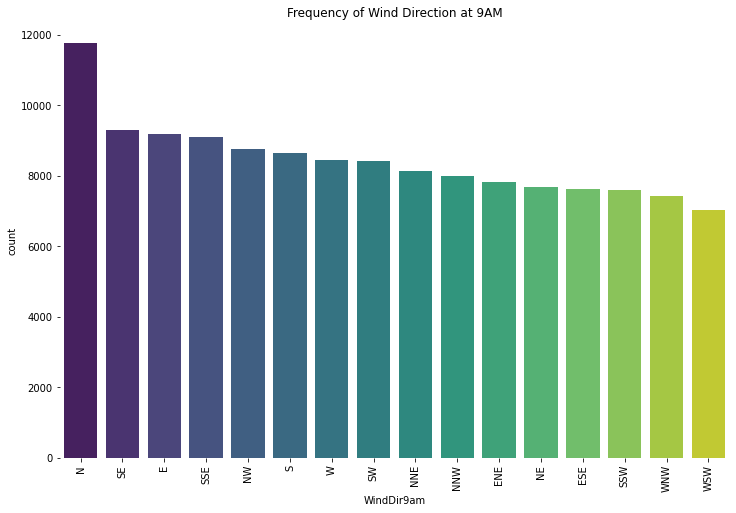

In [ ]:
#Visualisasi frekuensi kolom WindDir9am
plt.figure(figsize=(12, 8))

j = sns.countplot(x = 'WindDir9am', data = df, order = df['WindDir9am'].value_counts().index,
              palette='viridis',linewidth=2)
j.set_xticklabels(j.get_xticklabels(), rotation=90)
j.set_title('Frequency of Wind Direction at 9AM', loc='center')
sns.despine(bottom = True, left = True) 

Top 5 Arah angin pada jam 9 pagi dengan frekuensi terbanyak :
1.   N
2.   SE
3.   E
4.   SSE
5.   NW

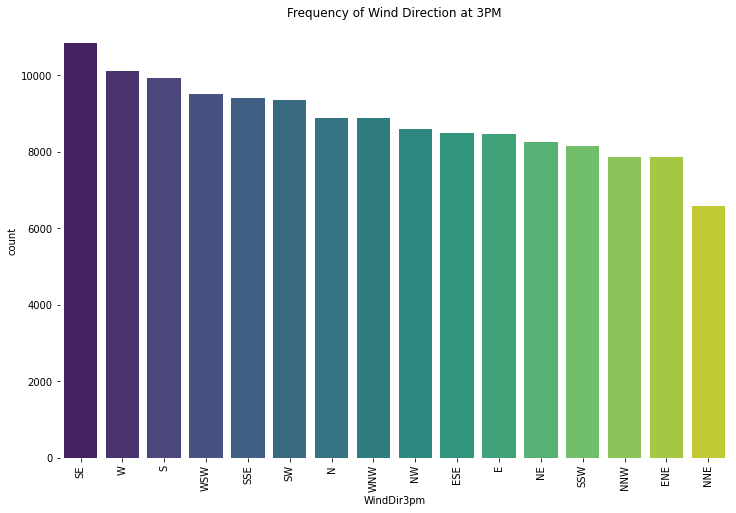

In [ ]:
#Visualisasi frekuensi kolom WindDir3pm
plt.figure(figsize=(12, 8))

j = sns.countplot(x = 'WindDir3pm', data = df, order = df['WindDir3pm'].value_counts().index,
              palette='viridis',linewidth=2)
j.set_xticklabels(j.get_xticklabels(), rotation=90)
j.set_title('Frequency of Wind Direction at 3PM', loc='center')
sns.despine(bottom = True, left = True) 

Top 5 Arah angin pada jam 3 sore dengan frekuensi terbanyak :
1.   SE
2.   W
3.   S
4.   WSW
5.   SSE





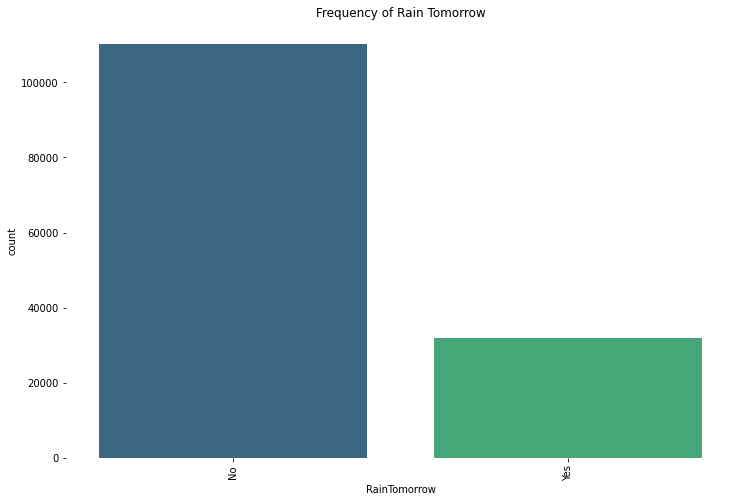

In [ ]:
#Visualisasi frekuensi kolom RainTomorrow
plt.figure(figsize=(12, 8))

j = sns.countplot(x = 'RainTomorrow', data = df, order = df['RainTomorrow'].value_counts().index,
              palette='viridis',linewidth=2)
j.set_xticklabels(j.get_xticklabels(), rotation=90)
j.set_title('Frequency of Rain Tomorrow', loc='center')
sns.despine(bottom = True, left = True) 

In [ ]:
df['RainTomorrow'].value_counts()/len(df)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

Kita dapat melihat dari chart dan hasil perhitungan, persentase tidak hujan (75,83%) lebih besar daripada hujan (21,91%).





#### Find the distribution of data

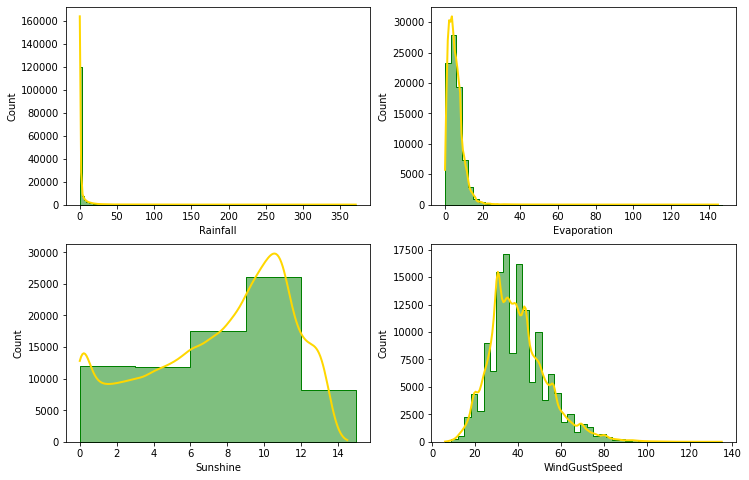

In [ ]:
#Visualisasi cek distribusi data menggunakan histplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

j = sns.histplot(df, x="Rainfall", kde=True, element="step", binwidth=3, color='green',ax=axes[0, 0]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
k = sns.histplot(df, x="Evaporation", kde=True, element="step", binwidth=3, color='green',ax=axes[0, 1]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
l = sns.histplot(df, x="Sunshine", kde=True, element="step", binwidth=3, color='green',ax=axes[1, 0]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
m = sns.histplot(df, x="WindGustSpeed", kde=True, element="step", binwidth=3, color='green',ax=axes[1, 1]
                , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})

j.lines[0].set_color('gold')
k.lines[0].set_color('gold')
l.lines[0].set_color('gold')
m.lines[0].set_color('gold')

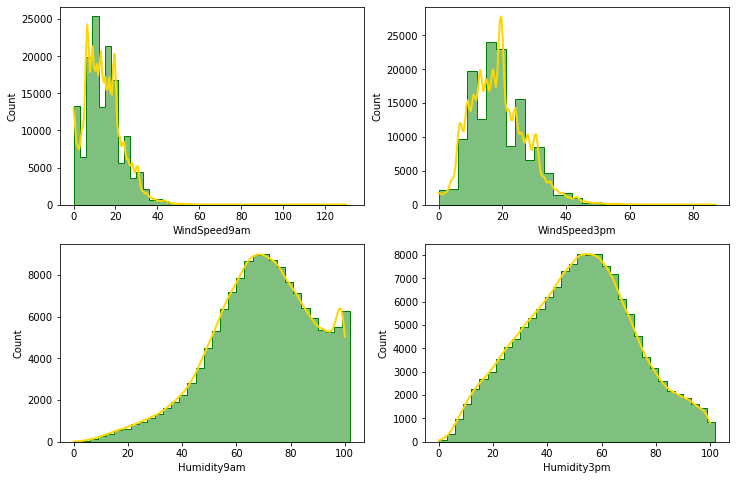

In [ ]:
#Visualisasi cek distribusi data menggunakan histplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

j = sns.histplot(df, x="WindSpeed9am", kde=True, element="step", binwidth=3, color='green',ax=axes[0, 0]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
k = sns.histplot(df, x="WindSpeed3pm", kde=True, element="step", binwidth=3, color='green',ax=axes[0, 1]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
l = sns.histplot(df, x="Humidity9am", kde=True, element="step", binwidth=3, color='green',ax=axes[1, 0]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
m = sns.histplot(df, x="Humidity3pm", kde=True, element="step", binwidth=3, color='green',ax=axes[1, 1]
                , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})

j.lines[0].set_color('gold')
k.lines[0].set_color('gold')
l.lines[0].set_color('gold')
m.lines[0].set_color('gold')

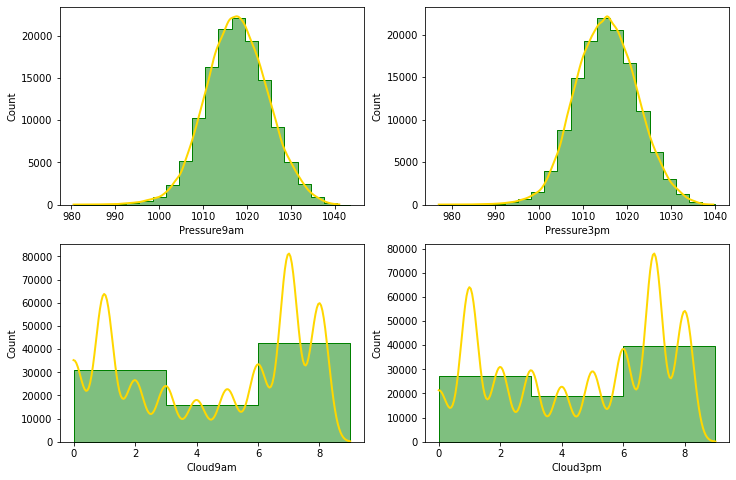

In [ ]:
#Visualisasi cek distribusi data menggunakan histplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

j = sns.histplot(df, x="Pressure9am", kde=True, element="step", binwidth=3, color='green',ax=axes[0, 0]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
k = sns.histplot(df, x="Pressure3pm", kde=True, element="step", binwidth=3, color='green',ax=axes[0, 1]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
l = sns.histplot(df, x="Cloud9am", kde=True, element="step", binwidth=3, color='green',ax=axes[1, 0]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
m = sns.histplot(df, x="Cloud3pm", kde=True, element="step", binwidth=3, color='green',ax=axes[1, 1]
                , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})

j.lines[0].set_color('gold')
k.lines[0].set_color('gold')
l.lines[0].set_color('gold')
m.lines[0].set_color('gold')

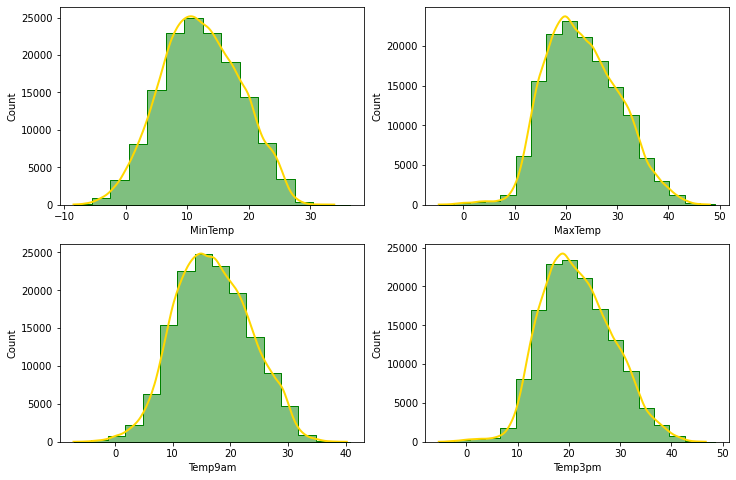

In [ ]:
#Visualisasi cek distribusi data menggunakan histplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

j = sns.histplot(df, x="MinTemp", kde=True, element="step", binwidth=3, color='green',ax=axes[0, 0]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
k = sns.histplot(df, x="MaxTemp", kde=True, element="step", binwidth=3, color='green',ax=axes[0, 1]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
l = sns.histplot(df, x="Temp9am", kde=True, element="step", binwidth=3, color='green',ax=axes[1, 0]
                 , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})
m = sns.histplot(df, x="Temp3pm", kde=True, element="step", binwidth=3, color='green',ax=axes[1, 1]
                , line_kws={'color': 'yellow', 'linewidth': 2, 'linestyle':'-'})

j.lines[0].set_color('gold')
k.lines[0].set_color('gold')
l.lines[0].set_color('gold')
m.lines[0].set_color('gold')

Sebagian variabel memiliki chart histplot yang mengecil ke arah kanan/kiri seperti Rainfall, Evaporation, WindSpeed9am, dan WindSpeed3pm sehingga kita akan mencari outlier nya.

#### Find the outliers of data

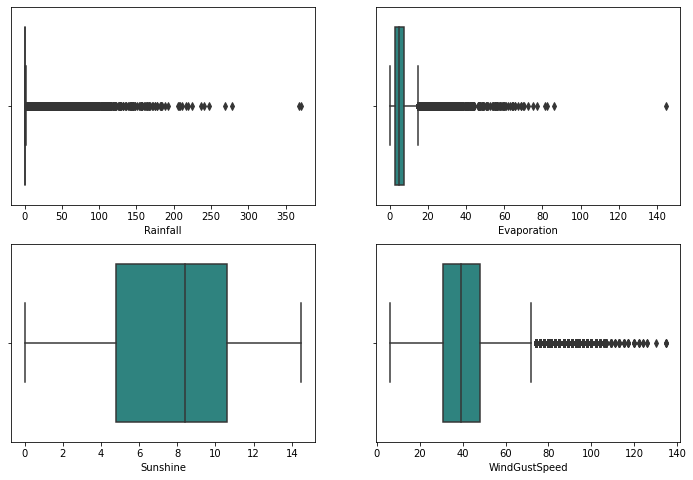

In [ ]:
#Visualisasi untuk cek outliers menggunakan boxplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(ax=axes[0, 0], data=df ,x='Rainfall',palette='viridis')
sns.boxplot(ax=axes[0, 1], data=df, x='Evaporation',palette='viridis')
sns.boxplot(ax=axes[1, 0], data=df, x='Sunshine',palette='viridis')
sns.boxplot(ax=axes[1, 1], data=df, x='WindGustSpeed',palette='viridis')

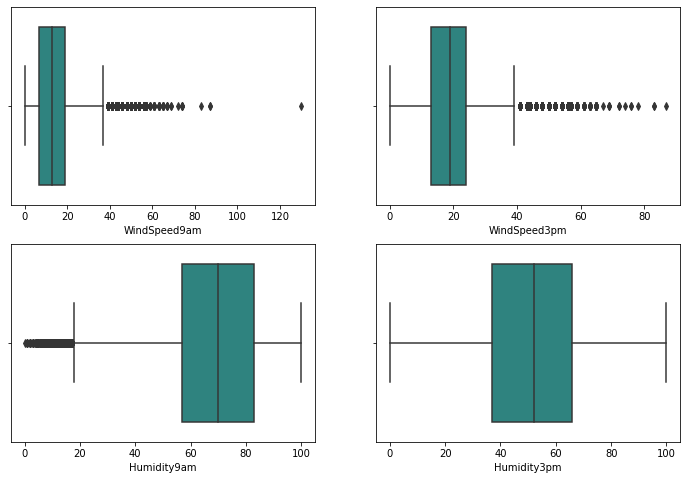

In [ ]:
#Visualisasi untuk cek outliers menggunakan boxplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(ax=axes[0, 0], data=df ,x='WindSpeed9am', palette='viridis')
sns.boxplot(ax=axes[0, 1], data=df, x='WindSpeed3pm',palette='viridis')
sns.boxplot(ax=axes[1, 0], data=df, x='Humidity9am',palette='viridis')
sns.boxplot(ax=axes[1, 1], data=df, x='Humidity3pm',palette='viridis')

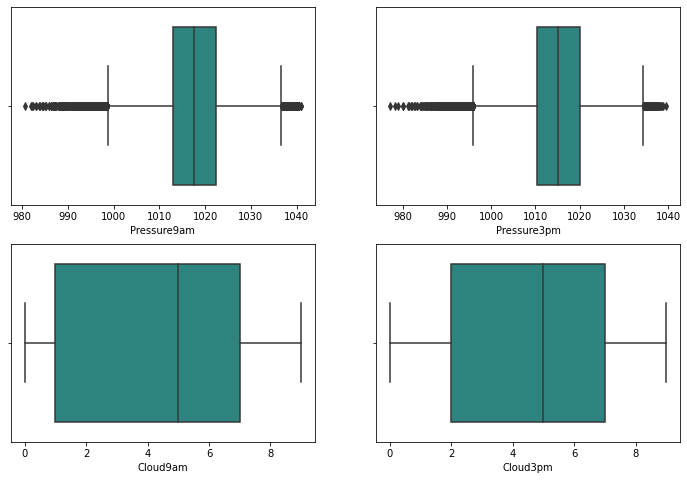

In [ ]:
#Visualisasi untuk cek outliers menggunakan boxplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(ax=axes[0, 0], data=df ,x='Pressure9am', palette='viridis')
sns.boxplot(ax=axes[0, 1], data=df, x='Pressure3pm',palette='viridis')
sns.boxplot(ax=axes[1, 0], data=df, x='Cloud9am',palette='viridis')
sns.boxplot(ax=axes[1, 1], data=df, x='Cloud3pm',palette='viridis')

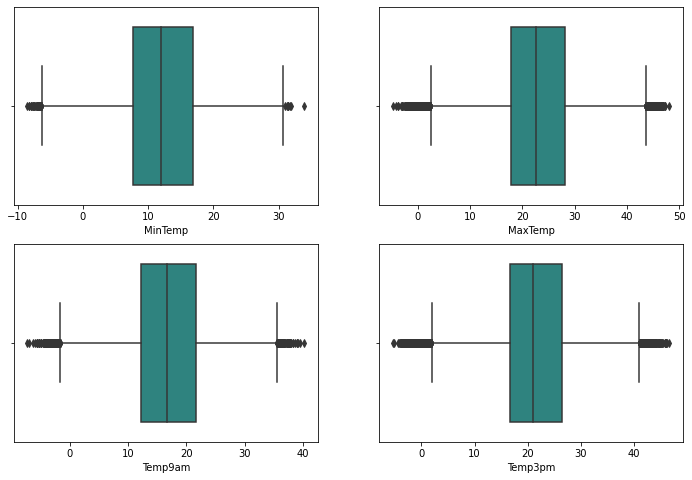

In [ ]:
#Visualisasi untuk cek outliers menggunakan boxplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(ax=axes[0, 0], data=df ,x='MinTemp', palette='viridis')
sns.boxplot(ax=axes[0, 1], data=df, x='MaxTemp',palette='viridis')
sns.boxplot(ax=axes[1, 0], data=df, x='Temp9am',palette='viridis')
sns.boxplot(ax=axes[1, 1], data=df, x='Temp3pm',palette='viridis')

Hanya kolom Cloud9am, Cloud3pm, Humidity3pm, Sunshine yang tidak memiliki outlier sisanya memiliki outlier.

In [ ]:
# Mencari nilai outlier pada variabel tsb
IQR_1 = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence_1 = df.Rainfall.quantile(0.25) - (IQR_1 * 1.5)
Upper_fence_1 = df.Rainfall.quantile(0.75) + (IQR_1 * 1.5)

IQR_2 = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence_2 = df.Evaporation.quantile(0.25) - (IQR_2 * 1.5)
Upper_fence_2 = df.Evaporation.quantile(0.75) + (IQR_2 * 1.5)

IQR_3 = df.WindGustSpeed.quantile(0.75) - df.WindGustSpeed.quantile(0.25)
Lower_fence_3 = df.WindGustSpeed.quantile(0.25) - (IQR_3 * 1.5)
Upper_fence_3 = df.WindGustSpeed.quantile(0.75) + (IQR_3 * 1.5)

IQR_4 = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence_4 = df.WindSpeed9am.quantile(0.25) - (IQR_4 * 1.5)
Upper_fence_4 = df.WindSpeed9am.quantile(0.75) + (IQR_4 * 1.5)

IQR_5 = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence_5 = df.WindSpeed3pm.quantile(0.25) - (IQR_5 * 1.5)
Upper_fence_5 = df.WindSpeed3pm.quantile(0.75) + (IQR_5 * 1.5)

IQR_6 = df.Pressure9am.quantile(0.75) - df.Pressure9am.quantile(0.25)
Lower_fence_6 = df.Pressure9am.quantile(0.25) - (IQR_6 * 1.5)
Upper_fence_6 = df.Pressure9am.quantile(0.75) + (IQR_6 * 1.5)

IQR_7 = df.Pressure3pm.quantile(0.75) - df.Pressure3pm.quantile(0.25)
Lower_fence_7 = df.Pressure3pm.quantile(0.25) - (IQR_7 * 1.5)
Upper_fence_7 = df.Pressure3pm.quantile(0.75) + (IQR_7 * 1.5)

IQR_8 = df.MinTemp.quantile(0.75) - df.MinTemp.quantile(0.25)
Lower_fence_8 = df.MinTemp.quantile(0.25) - (IQR_8 * 1.5)
Upper_fence_8 = df.MinTemp.quantile(0.75) + (IQR_8 * 1.5)

IQR_9 = df.MaxTemp.quantile(0.75) - df.MaxTemp.quantile(0.25)
Lower_fence_9 = df.MaxTemp.quantile(0.25) - (IQR_9 * 1.5)
Upper_fence_9 = df.MaxTemp.quantile(0.75) + (IQR_9 * 1.5)

IQR_10 = df.Temp9am.quantile(0.75) - df.Temp9am.quantile(0.25)
Lower_fence_10 = df.Temp9am.quantile(0.25) - (IQR_10 * 1.5)
Upper_fence_10 = df.Temp9am.quantile(0.75) + (IQR_10 * 1.5)

IQR_11 = df.Temp3pm.quantile(0.75) - df.Temp3pm.quantile(0.25)
Lower_fence_11 = df.Temp3pm.quantile(0.25) - (IQR_11 * 1.5)
Upper_fence_11 = df.Temp3pm.quantile(0.75) + (IQR_11 * 1.5)

print('Nilai outlier Rainfall adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_1, upperboundary=Upper_fence_1))
print('Nilai outlier Evaporation adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_2, upperboundary=Upper_fence_2))
print('Nilai outlier WindGustSpeed adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_3, upperboundary=Upper_fence_3))
print('Nilai outlier WindSpeed9am adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_4, upperboundary=Upper_fence_4))
print('Nilai outlier WindSpeed3pm adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_5, upperboundary=Upper_fence_5))
print('Nilai outlier Pressure9am adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_6, upperboundary=Upper_fence_6))
print('Nilai outlier Pressure3pm adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_7, upperboundary=Upper_fence_7))
print('Nilai outlier MinTemp adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_8, upperboundary=Upper_fence_8))
print('Nilai outlier MaxTemp adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_9, upperboundary=Upper_fence_9))
print('Nilai outlier Temp9am adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_10, upperboundary=Upper_fence_10))
print('Nilai outlier Temp3pm adalah < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Lower_fence_11, upperboundary=Upper_fence_11))

Nilai outlier Rainfall adalah < -1.2000000000000002 atau > 2.0
Nilai outlier Evaporation adalah < -4.600000000000001 atau > 14.600000000000001
Nilai outlier WindGustSpeed adalah < 5.5 atau > 73.5
Nilai outlier WindSpeed9am adalah < -11.0 atau > 37.0
Nilai outlier WindSpeed3pm adalah < -3.5 atau > 40.5
Nilai outlier Pressure9am adalah < 998.65 atau > 1036.65
Nilai outlier Pressure3pm adalah < 996.0 atau > 1034.4
Nilai outlier MinTemp adalah < -6.35 atau > 30.849999999999998
Nilai outlier MaxTemp adalah < 2.4499999999999975 atau > 43.65
Nilai outlier Temp9am adalah < -1.6500000000000004 atau > 35.550000000000004
Nilai outlier Temp3pm adalah < 1.9000000000000057 atau > 41.099999999999994


# **Stage 4**

## Data Processing




### Data Manipulation

In [ ]:
#mengekstraksi kolom date
df_new = df.copy()
df_new['Date'] = pd.to_datetime(df['Date'])
df_new['Year'] = df_new['Date'].dt.year
df_new['Month'] = df_new['Date'].dt.month
df_new['Day'] = df_new['Date'].dt.day

#menghapus kolom Date
df_new.drop('Date', axis=1, inplace = True)

#mengubah nilai kolom raintoday dan raintomorrow menjadi numerik (0,1)
df_new["RainToday"].replace({"Yes": 1, "No": 0}, inplace=True)
df_new["RainTomorrow"].replace({"Yes": 1, "No": 0}, inplace=True)
df_new.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5


### Delete Duplicate Data

In [ ]:
print(df_new.duplicated().sum())

0


### Missing Values Handling

In [ ]:
#mencari jumlah nilai yang null/NaN
total = df_new.isnull().sum().sort_values(ascending=False)
percent_1 = df_new.isnull().sum()/df_new.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Sunshine,69835,48.0
Evaporation,62790,43.2
Cloud3pm,59358,40.8
Cloud9am,55888,38.4
Pressure9am,15065,10.4


In [ ]:
#Men-drop nilai nan di kolom yang memiliki missing value di atas 30%
df_new = df_new.dropna(how='any', subset = ["Sunshine","Evaporation","Cloud3pm","Cloud9am",
                                            "RainToday","RainTomorrow"])

In [ ]:
#Mengganti nilai nan untuk data kategori dengan mode dan data numerik dengan median/mean
cateogry_columns=df_new.select_dtypes(include=['object']).columns.tolist()
integer_columns=df_new.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_new:
    if df_new[column].isnull().any():
        if(column in cateogry_columns):
            df_new[column]=df_new[column].fillna(df_new[column].mode()[0])
        else:
            df_new[column]=df_new[column].fillna(df_new[column].median())

In [ ]:
#men-cek jumlah nilai yang null/NaN terakhir
df_new.isnull().sum().value_counts

<bound method IndexOpsMixin.value_counts of Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
Season           0
dtype: int64>

In [ ]:
df_new.shape

(62294, 25)

### Outlier Values Handling

In [ ]:
#menentukan nilai outlier
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
#mencari jumlah nilai outlier
total = ((df_new < (Q1 - 1.5 * IQR)) | (df_new > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False)
percent_1 = ((df_new < (Q1 - 1.5 * IQR)) | (df_new > (Q3 + 1.5 * IQR))).sum()/((df_new < (Q1 - 1.5 * IQR)) | (df_new > (Q3 + 1.5 * IQR))).count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
outlier_data = pd.concat([total, percent_2], axis=1, keys=['Total Outlier', '%'])
outlier_data.head()

,Total Outlier,%
RainToday,13940,22.4
RainTomorrow,13909,22.3
Rainfall,11148,17.9
Evaporation,1254,2.0
Pressure3pm,0,0.0


In [ ]:
IQR_ev = df_new.Evaporation.quantile(0.75) - df_new.Evaporation.quantile(0.25)
Lower_fence_ev = df_new.Evaporation.quantile(0.25) - (IQR_ev * 1.5)
Upper_fence_ev = df_new.Evaporation.quantile(0.75) + (IQR_ev * 1.5)

In [ ]:
#menghandle nilai outlier di kolom evaporation sebesar 2% dengan menggunakan drop

IQR_ev = df_new.Evaporation.quantile(0.75) - df_new.Evaporation.quantile(0.25)
Lower_fence_ev = df_new.Evaporation.quantile(0.25) - (IQR_ev * 1.5)
Upper_fence_ev = df_new.Evaporation.quantile(0.75) + (IQR_ev * 1.5)
df_new = df_new.drop(df_new.index[df_new['Evaporation'] > Upper_fence_ev])

In [ ]:
#men-cek jumlah nilai outlier terakhir
((df_new < (Q1 - 1.5 * IQR)) | (df_new > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False)

RainToday        13838
RainTomorrow     13775
Rainfall         11061
Pressure9am          0
Cloud9am             0
Day                  0
Evaporation          0
Humidity3pm          0
Humidity9am          0
Location             0
MaxTemp              0
MinTemp              0
Month                0
Pressure3pm          0
Year                 0
WindSpeed9am         0
Season               0
Sunshine             0
Temp3pm              0
Temp9am              0
WindDir3pm           0
WindDir9am           0
WindGustDir          0
WindGustSpeed        0
WindSpeed3pm         0
Cloud3pm             0
dtype: int64

### Feature Engineering


According to http://www.bom.gov.au .In Australia, the seasons are defined by grouping the calendar months in the following way:

* Summer (1) - the three hottest months December, January and February.
* Autumn (2) - the transition months March, April and May.
* Winter (3) - the three coldest months June, July and August.
* Spring (4) - the three transition months September, October and November.

In [ ]:
#membuat fungsi untuk mengkategorikan season 
def get_season(row):
    if row['Month'] in (12, 1, 2):
        season = 1
    elif row['Month'] in (3, 4, 5):
        season = 2
    elif row['Month'] in (6, 7, 8):
        season = 3   
    else:
        season = 4
    return season

In [ ]:
#membuat kolom baru - season
df_new['Season'] = df_new.apply(get_season, axis=1)

In [ ]:
#Mengubah variabel dibawah menjadi values
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

WindGustDir_encode = LabelEncoder()
df_new['WindGustDir']=WindGustDir_encode.fit_transform(df_new['WindGustDir'])

WindDir9am_encode = LabelEncoder()
df_new['WindDir9am']=WindDir9am_encode.fit_transform(df_new['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
df_new['WindDir3pm']=WindDir3pm_encode.fit_transform(df_new['WindDir3pm'])

In [ ]:
#ubah tipe data kolom RainToday dan RainTomorrow
df_new['RainToday'] = df_new['RainToday'].astype('int')
df_new['RainTomorrow'] = df_new['RainTomorrow'].astype('int')

### Splitting dataset into independent and dependent variable

In [ ]:
#Menentukan dataset independent berdasarkan korelasi (data setelah missing values handling dan outlier handling)
df_new.corr().abs()['RainTomorrow'].sort_values(ascending = False)

RainTomorrow     1.000000
Humidity3pm      0.448461
Sunshine         0.447980
Cloud3pm         0.389732
Cloud9am         0.318043
RainToday        0.309554
Humidity9am      0.263987
Pressure9am      0.262266
Rainfall         0.254542
Pressure3pm      0.237917
WindGustSpeed    0.227000
Temp3pm          0.177115
MaxTemp          0.139904
Evaporation      0.130320
MinTemp          0.095785
WindSpeed9am     0.087409
WindSpeed3pm     0.080354
WindGustDir      0.041352
WindDir3pm       0.039832
WindDir9am       0.036770
Temp9am          0.009696
Year             0.008857
Season           0.005251
Day              0.001176
Month            0.000102
Name: RainTomorrow, dtype: float64

In [ ]:
# Memisahkan dataset menjadi predictor dan target
X = df_new[['WindGustSpeed','Rainfall','Evaporation','Sunshine','Humidity9am',
            'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','RainToday']].values
y = df_new['RainTomorrow'].values

print("X:", X.shape)
print("y:", y.shape)

X: (61040, 20)
y: (61040,)


### Splitting Dataset into Training and Test Set


In [ ]:
#memisahkan dataset train dengan test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (42728, 20)
X_test: (18312, 20)
y_train: (42728,)
y_test: (18312,)


In [ ]:
#menghitung komposisi nilai y_train
pd.value_counts(y_train)

0    33113
1     9615
dtype: int64

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Imbalanced Dataset

In [ ]:
!pip install imblearn

In [ ]:
#menggunakan metode SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#menghitung komposisi nilai y_train
pd.value_counts(y_smote)

1    33113
0    33113
dtype: int64

# **Stage 5**

## Build Model with Machine Learning




### Model Selection

### Train Dataset

In [ ]:
#save dataframe ke lokal
from google.colab import files
df_new.to_excel('output1.xlsx', engine='xlsxwriter')   
files.download('output1.xlsx')